In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import pathlib

In [4]:
BASE_DIR = pathlib.Path().absolute()
NOTEBOOKS_DIR = BASE_DIR / "notebooks"

In [5]:
from os import mkdir
mkdir(NOTEBOOKS_DIR)

In [6]:
GET_DATA_NOTEBOOK_PATH = NOTEBOOKS_DIR / "Fetching_data.ipynb"
PRE_PROCESS_DATA_NOTEBOOK_PATH = NOTEBOOKS_DIR / "Preprocess_data.ipynb"

In [7]:
!curl "https://raw.githubusercontent.com/malpani-yashasva/synthetic_data_generation/master/notebooks/Fetching_data.ipynb" -o "$GET_DATA_NOTEBOOK_PATH"
!curl "https://raw.githubusercontent.com/malpani-yashasva/synthetic_data_generation/master/notebooks/Preprocess_data.ipynb" -o "$PRE_PROCESS_DATA_NOTEBOOK_PATH"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 27568  100 27568    0     0   135k      0 --:--:-- --:--:-- --:--:--  135k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 46870  100 46870    0     0   214k      0 --:--:-- --:--:-- --:--:--  214k


In [8]:
%run "$GET_DATA_NOTEBOOK_PATH"
%run "$PRE_PROCESS_DATA_NOTEBOOK_PATH"

In [9]:
df = pd.read_csv("/data/processed_csv.csv")

In [14]:
import json
with open("/data/metadata.json", 'r') as infile:
  metadata_json = json.load(infile)

metadata_json

{'num_features': 116, 'num_labels': 23}

In [15]:
num_features = metadata_json['num_features']
num_labels = metadata_json['num_labels']

In [10]:
train_tensor = tf.convert_to_tensor(df, dtype=tf.dtypes.float32)
train_tensor

<tf.Tensor: shape=(494021, 139), dtype=float32, numpy=
array([[0.0000000e+00, 2.6104178e-07, 1.0571301e-03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 3.4469051e-07, 9.4268842e-05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 3.3892164e-07, 2.5933629e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 2.9277061e-07, 2.3276257e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 4.1968593e-07, 2.3276257e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 3.1584611e-07, 2.3935751e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)>

In [12]:
from tensorflow import keras
from keras import layers

In [16]:
LATENT_DIMENSIONS = 100
InputA = layers.Input(shape=(LATENT_DIMENSIONS + num_labels, ))
a = layers.Dense(50, activation='linear')(InputA)
a = layers.Dense(50, activation='tanh')(a)
a = layers.LeakyReLU(0.3)(a)
a = layers.Dense(25, activation='linear')(a)
a = layers.Dense(25, activation='tanh')(a)
a = layers.LeakyReLU(0.3)(a)
a = layers.Dense(10, activation='linear')(a)
a = layers.Dense(10, activation='tanh')(a)
a = layers.LeakyReLU(0.3)(a)
outputA = layers.Dense(3, activation='softmax')(a)
modelA = keras.Model(inputs=InputA, outputs=outputA)
InputB = layers.Input(shape=(LATENT_DIMENSIONS + num_labels, ))
b = layers.Dense(100, activation='linear')(InputB)
b = layers.Dense(100, activation='tanh')(b)
b = layers.LeakyReLU(0.3)(b)
b = layers.Dense(80, activation='linear')(b)
b = layers.Dense(80, activation='tanh')(b)
b = layers.LeakyReLU(0.3)(b)
b = layers.Dense(50, activation='linear')(b)
b = layers.Dense(50, activation='tanh')(b)
b = layers.LeakyReLU(0.3)(b)
outputB = layers.Dense(66, activation='softmax')(b)
modelB = keras.Model(inputs=InputB, outputs=outputB)
InputC = layers.Input(shape=(LATENT_DIMENSIONS + num_labels, ))
c = layers.Dense(50, activation='linear')(InputC)
c = layers.Dense(50, activation='tanh')(c)
c = layers.LeakyReLU(0.3)(c)
c = layers.Dense(30, activation='linear')(c)
c = layers.Dense(30, activation='tanh')(c)
c = layers.LeakyReLU(0.3)(c)
c = layers.Dense(25, activation='linear')(c)
c = layers.Dense(25, activation='tanh')(c)
c = layers.LeakyReLU(0.3)(c)
c = layers.Dense(15, activation='tanh')(c)
c = layers.LeakyReLU(0.3)(c)
outputC = layers.Dense(11, activation='softmax')(c)
modelC = keras.Model(inputs=InputC, outputs=outputC)

InputE = layers.Input(shape=(LATENT_DIMENSIONS + num_labels, ))
e = layers.Dense(50, activation='linear')(InputE)
e = layers.Dense(50, activation='tanh')(e)
e = layers.LeakyReLU(0.3)(e)
e = layers.Dense(45, activation='linear')(e)
e = layers.Dense(45, activation='tanh')(e)
e = layers.LeakyReLU(0.3)(e)
e = layers.Dense(40, activation='linear')(e)
e = layers.Dense(40, activation='tanh')(e)
e = layers.LeakyReLU(0.3)(e)
outputE = layers.Dense(36, activation='sigmoid')(e)
modelE = keras.Model(inputs=InputE, outputs=outputE)

main_input1 = layers.Input(shape=(LATENT_DIMENSIONS, ))
main_input2 = layers.Input(shape=(num_labels, ))
main_input = layers.Concatenate(axis=1)([main_input1, main_input2])

d = layers.Dense(50, activation='linear')(main_input)
d = layers.Dense(40, activation = 'linear')(d)
d = layers.LeakyReLU(0.3)(d)
d = layers.Dense(30, activation = 'linear')(d)
outputD = layers.Dense(23, activation='softmax')(d)
modelD = keras.Model(inputs=main_input, outputs = outputD)

main_output = layers.Concatenate(axis = 1)([modelE(main_input), modelA(main_input), modelB(main_input), modelC(main_input)])
generator = keras.Model(inputs = [main_input1, main_input2], outputs = [main_output, outputD])
generator.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 input_13 (InputLayer)       [(None, 23)]                 0         []                            
                                                                                                  
 concatenate_2 (Concatenate  (None, 123)                  0         ['input_12[0][0]',            
 )                                                                   'input_13[0][0]']            
                                                                                                  
 dense_62 (Dense)            (None, 50)                   6200      ['concatenate_2[0][0]']

In [17]:
critic_input = layers.Input(shape=(num_features, ))
critic_label_input = layers.Input(shape=(num_labels, ))
c1 = layers.Concatenate(axis = 1)([critic_input, critic_label_input])
c = layers.Dense(139, activation='linear')(c1)
c = layers.LeakyReLU(0.3)(c)
c = layers.Dense(139, activation='tanh')(c)
c = layers.Add()([c1, c])
c2 = layers.Dense(120, activation='linear')(c)
c = layers.LeakyReLU(0.3)(c2)
c = layers.Dense(120, activation='tanh')(c)
c = layers.Add()([c2, c])
c3 = layers.Dense(80, activation='linear')(c)
c = layers.LeakyReLU(0.3)(c3)
c = layers.Dense(80, activation='tanh')(c)
c = layers.Add()([c3, c])
c4 = layers.Dense(40, activation='linear')(c)
c = layers.LeakyReLU(0.3)(c4)
c = layers.Dense(40, activation='tanh')(c)
c = layers.Add()([c4, c])
c5 = layers.Dense(10, activation='linear')(c)
c = layers.LeakyReLU(0.3)(c5)
c = layers.Dense(5, activation='linear')(c)
c = layers.LeakyReLU(0.3)(c)
c_output = layers.Dense(1, activation='linear')(c)
critic = keras.Model(inputs = [critic_input, critic_label_input], outputs = c_output)
critic.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 116)]                0         []                            
                                                                                                  
 input_16 (InputLayer)       [(None, 23)]                 0         []                            
                                                                                                  
 concatenate_4 (Concatenate  (None, 139)                  0         ['input_15[0][0]',            
 )                                                                   'input_16[0][0]']            
                                                                                                  
 dense_66 (Dense)            (None, 139)                  19460     ['concatenate_4[0][0]']

In [18]:
class CTGAN(keras.Model):
  def __init__(self, generator, critic, latent_dim, critic_extra_steps, gp_weight):
    super().__init__()
    self.generator = generator
    self.critic = critic
    self.latent_dim = latent_dim
    self.critic_extra_steps = critic_extra_steps
    self.gp_weight = gp_weight

  def compile(self, g_opt, c_opt, c_loss_fn, g_loss_fn):
    super().compile()
    self.g_opt = g_opt
    self.c_opt = c_opt
    self.c_loss_fn = c_loss_fn
    self.g_loss_fn = g_loss_fn

  def reg_term(self, batch_size, z1, z2, c):
    """
    This function calculates the mode seeking regularisation term which reduces the euclidian distance between
    two latent vectors in the latent space created by the generator network
    """
    del_z = tf.norm(z1 - z2, ord='euclidean', axis=-1)
    del_z = tf.reduce_mean(del_z)
    [X1, c1] = self.generator([z1, c], training=True)
    [X2, c2] = self.generator([z2, c], training=True)
    del_X = tf.norm(X1 - X2, ord='euclidean', axis=-1)
    del_X = tf.reduce_mean(del_X)
    return del_X/del_z

  def gradient_penalty(self, batch_size, real_data, fake_data, one_hot_labels):
    """
    This function return the classic gradient penalty term used in WGAN networks which is used to regularize the critic
    network output
    """
    alpha = tf.random.normal([batch_size, 1], 0.0, 1.0)
    fake_data = tf.cast(fake_data, dtype = tf.float32)
    real_data = tf.cast(real_data, dtype = tf.float32)
    diff = fake_data - real_data
    interpolated_data = real_data + alpha * diff

    with tf.GradientTape() as gp_tape:
      gp_tape.watch(interpolated_data)
      pred = self.critic([interpolated_data, one_hot_labels], training=True)

    grads = gp_tape.gradient(pred, [interpolated_data])[0]
    #Calculate the norm of the gradients.
    norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1]))
    gp = tf.reduce_mean((norm - 1.0) ** 2)
    return gp

  def train_step(self, data):
    real_tensor, real_labels = data
    latent_vector_size = tf.shape(real_tensor)[0]
    coeff = 1/latent_vector_size
    coeff = tf.cast(coeff, dtype=tf.dtypes.float32)
    for i in range(self.critic_extra_steps):
      random_latent_vector = tf.random.normal([latent_vector_size, self.latent_dim], 0.0, 1.0)
      with tf.GradientTape() as tape:
        [fake_data, fake_labels] = self.generator([random_latent_vector, real_labels], training = True)
        fake_logits = self.critic([fake_data, fake_labels], training = True)
        real_logits = self.critic([real_tensor, real_labels], training = True)
        c_wass_loss = self.c_loss_fn(real_logits, fake_logits)
        c_gp_loss = self.gradient_penalty(latent_vector_size, real_tensor, fake_data, fake_labels)
        c_loss = c_wass_loss + self.gp_weight * c_gp_loss
        c_loss = c_loss * coeff

      c_gradients = tape.gradient(c_loss, self.critic.trainable_variables)
      self.c_opt.apply_gradients(zip(c_gradients, self.critic.trainable_variables))

    random_latent_vector = tf.random.normal([latent_vector_size, self.latent_dim], 0.0, 1.0)
    with tf.GradientTape() as tape:
      [fake_data, fake_labels] = self.generator([random_latent_vector, real_labels], training = True)
      fake_logits = self.critic([fake_data, fake_labels])
      g_loss1 = self.g_loss_fn(fake_logits)
      g_loss2 = keras.losses.categorical_crossentropy(fake_labels, real_labels)
      z1 = tf.random.normal([latent_vector_size, self.latent_dim], 0.0, 1.0)
      z2 = tf.random.normal([latent_vector_size, self.latent_dim], 0.0, 1.0)
      mode_seeking_term = self.reg_term(latent_vector_size, z1, z2, real_labels)
      g_loss = g_loss1 + tf.reduce_mean(g_loss2) - 10.0 * mode_seeking_term
      g_loss = g_loss * coeff

    g_gradients = tape.gradient(g_loss, self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(g_gradients, self.generator.trainable_variables))

    return {'c_loss' : c_loss, 'g_loss' : g_loss}


def critic_loss(real_logits, fake_logits):
    real_loss = tf.reduce_mean(real_logits)
    fake_loss = tf.reduce_mean(fake_logits)
    return (fake_loss - real_loss)

def generator_loss(fake_logits):
    return -tf.reduce_mean(fake_logits)

generator_optimizer = keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.5, beta_2=0.9
)
critic_optimizer = keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.5, beta_2=0.9
)

ctgan = CTGAN(
    generator = generator,
    critic = critic,
    latent_dim = LATENT_DIMENSIONS,
    critic_extra_steps = 1,
    gp_weight = 10.0
)

ctgan.compile(
    g_opt = generator_optimizer,
    c_opt = critic_optimizer,
    c_loss_fn = critic_loss,
    g_loss_fn = generator_loss
)

In [24]:
real_dataframe = pd.DataFrame(train_tensor)
sampling_pool = []

for i in range(num_labels):
  select = real_dataframe.loc[real_dataframe[i + num_features] == 1.0]
  sampling_pool.append(select)

In [25]:
# Here we construct a probability mass function for each label in our real dataset
# This ensures that the data generated by our generator mimics real data distribution.
label_pmf = np.ndarray(shape=[num_labels, ])
for i in range(num_labels):
  label_pmf[i] = len(sampling_pool[i])/len(real_dataframe)

In [26]:
label_pmf

array([4.45932460e-03, 6.07261635e-05, 1.61936436e-05, 1.07282889e-04,
       2.42904654e-05, 2.52418419e-03, 4.25083144e-05, 1.82178490e-05,
       1.41694381e-05, 2.16996848e-01, 4.67591459e-04, 1.96910658e-01,
       6.07261635e-06, 8.09682180e-06, 5.34390238e-04, 2.10517367e-03,
       2.02420545e-05, 3.21646246e-03, 5.68376648e-01, 4.04841090e-06,
       1.98169713e-03, 2.06468956e-03, 4.04841090e-05])

In [36]:
BATCH_SIZE = 1024
# Now we define a function for sampling a particular label type from our dataset and then train our generator and critic
# This method is known as training by sampling method usually used in conditional GAN architectures
def train_ctgan(ctgan_model, sampling_pool, num_epochs, k_value):
  select_dataframe = sampling_pool[k_value]
  if len(select_dataframe) > BATCH_SIZE:
    select_dataframe = select_dataframe.sample(BATCH_SIZE)
  real_labels = tf.convert_to_tensor(select_dataframe[np.arange(num_features, num_features + num_labels)], dtype=tf.dtypes.float32)
  real_tensor = tf.convert_to_tensor(select_dataframe[np.arange(0, num_features)], dtype = tf.dtypes.float32)
  dataset = tf.data.Dataset.from_tensor_slices((real_tensor, real_labels))
  dataset = dataset.shuffle(buffer_size=1024).batch(len(real_tensor))
  history = ctgan_model.fit(dataset, epochs = num_epochs, verbose = 0)

  return history

In [39]:
NUM_K_VALUES = 500
choices = np.arange(num_labels)
k_values = np.random.choice(choices, NUM_K_VALUES, p=label_pmf)
training_history = []

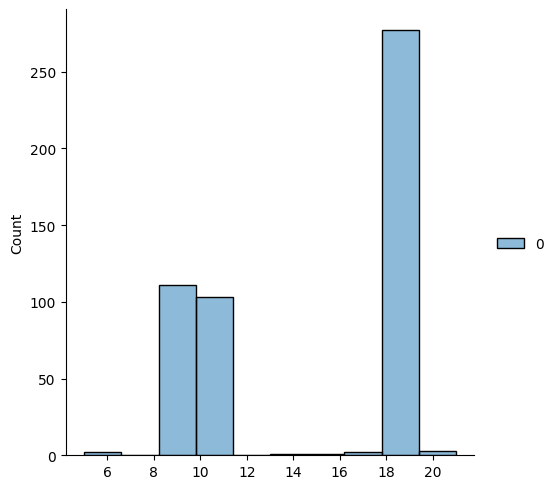

In [40]:
import seaborn as sns
sns.displot(k_values.reshape(-1, 1))

In [41]:
for i in range(NUM_K_VALUES):
   k_value = k_values[i]
   history = train_ctgan(ctgan_model = ctgan, num_epochs = 2, sampling_pool = sampling_pool, k_value = k_value)
   training_history.append(history.history)
   if(i % (NUM_K_VALUES/10) == 0):
    print(f"c_loss : {training_history[i]['c_loss'][0]}     -     g_loss : {training_history[i]['g_loss'][0]}")

c_loss : 0.03391348943114281     -     g_loss : 0.01510346494615078
c_loss : -0.0005912732449360192     -     g_loss : 0.001911390689201653
c_loss : -0.0007103573298081756     -     g_loss : 5.85261732339859e-05
c_loss : -0.0011683441698551178     -     g_loss : -0.0013880624901503325
c_loss : -0.001126407878473401     -     g_loss : -0.0008620934095233679
c_loss : -0.0007913422305136919     -     g_loss : -0.0013827248476445675
c_loss : -0.0017540245316922665     -     g_loss : -0.00029758422169834375
c_loss : -0.002655704040080309     -     g_loss : -0.0012407151516526937
c_loss : -0.0006486302008852363     -     g_loss : -0.0012160935439169407
c_loss : -0.0023259299341589212     -     g_loss : -0.001495476346462965


In [43]:
MODEL_DIR = BASE_DIR / "models"
MODEL_DIR.mkdir(exist_ok=True)

In [44]:
GENERATOR_MODEL_PATH = MODEL_DIR / "generator.keras"
CRITIC_MODEL_PATH = MODEL_DIR / "critic.keras"

In [45]:
generator.save(GENERATOR_MODEL_PATH)
critic.save(CRITIC_MODEL_PATH)

In [46]:
random_latent_vector = tf.random.normal([len(train_tensor), LATENT_DIMENSIONS])
labels = tf.convert_to_tensor(pd.DataFrame(train_tensor)[np.arange(num_features, num_features + num_labels)])
fake_data, fake_labels = generator([random_latent_vector, labels])

In [47]:
c_loss=[]
g_loss = []
for i in range(len(training_history)):
   for loss in training_history[i]['c_loss']:
     c_loss.append(loss)
   for loss in training_history[i]['g_loss']:
     g_loss.append(loss)

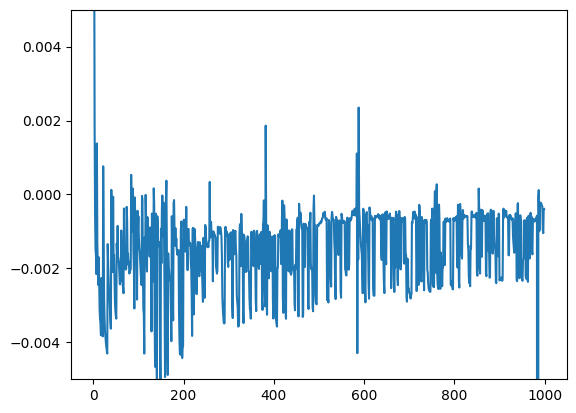

In [49]:
import matplotlib.pyplot as plt
plt.plot(c_loss)
ax = plt.gca()
ax.set_ylim(-0.005, 0.005)
plt.show()

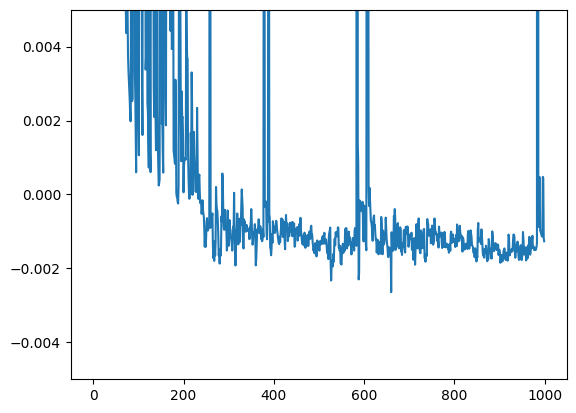

In [57]:
plt.plot(g_loss)
ax = plt.gca()
ax.set_ylim(-0.005, 0.005)
plt.show()

In [58]:
# to measure the quality of data produced, we train an intrusion detection model on the fake data produced.
# then we use this trained model to evaluate on real data. The higher the evaluation accuracy, better the dataset produced
intrusion_detection_model = keras.Sequential([
    layers.Input(shape=(num_features,)),
    layers.Dense(100, activation='linear'),
    layers.LeakyReLU(0.3),
    layers.Dense(85, activation = 'relu'),
    layers.Dense(75, activation='linear'),
    layers.LeakyReLU(0.3),
    layers.Dense(50, activation='relu'),
    layers.Dense(23, activation='softmax')
])

intrusion_detection_model.compile(loss = keras.losses.CategoricalCrossentropy(),
               optimizer = keras.optimizers.Adam(learning_rate = 0.001),
               metrics = ['accuracy'])

intrusion_detection_model.fit(fake_data, fake_labels, epochs = 5, verbose = 1, batch_size = BATCH_SIZE)

Epoch 1/5
483/483 [==============================] - 6s 4ms/step - loss: 0.4275 - accuracy: 0.8550
Epoch 2/5
483/483 [==============================] - 2s 4ms/step - loss: 0.3300 - accuracy: 0.8727
Epoch 3/5
483/483 [==============================] - 2s 4ms/step - loss: 0.3220 - accuracy: 0.8773
Epoch 4/5
483/483 [==============================] - 2s 4ms/step - loss: 0.3172 - accuracy: 0.8795
Epoch 5/5
483/483 [==============================] - 2s 5ms/step - loss: 0.3161 - accuracy: 0.8799


In [59]:
from sklearn import model_selection
real_dataframe = pd.DataFrame(train_tensor)
labels_one_hot = real_dataframe[np.arange(num_features, num_features + num_labels)]
real_dataframe.drop(np.arange(num_features, num_features + num_labels), axis = 1, inplace = True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    real_dataframe,
    labels_one_hot,
    test_size = 0.3,
    train_size = 0.7,
    random_state = 42,
    shuffle = True
)
X_train = tf.convert_to_tensor(X_train, dtype = tf.dtypes.float32)
X_test = tf.convert_to_tensor(X_test, dtype = tf.dtypes.float32)
y_train = tf.convert_to_tensor(y_train, dtype = tf.dtypes.float32)
y_test = tf.convert_to_tensor(y_test, dtype = tf.dtypes.float32)


In [60]:
intrusion_detection_model.evaluate(X_train, y_train)

10807/10807 [==============================] - 28s 3ms/step - loss: 0.5945 - accuracy: 0.9034


[0.5944793224334717, 0.9033555388450623]

In [61]:
intrusion_detection_model.evaluate(X_test, y_test)

4632/4632 [==============================] - 14s 3ms/step - loss: 0.5987 - accuracy: 0.9025


[0.5987288951873779, 0.9024742245674133]